In [1]:
## Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras # to build Neural Network
import pandas as pd
import matplotlib.image as mpimg
import glob, os, random
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# extra
import matplotlib.image as mpimg
from tabulate import tabulate
from sklearn.model_selection import KFold
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from keras import applications
import gc
from skimage import data, io, filters

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
base_path  = '/content/drive/MyDrive/Awareness of Waste Recycling'

classes = os.listdir(base_path)
print(classes)

['metal', 'e-waste', 'glass', 'plastic', 'light blubs', 'batteries', 'organic', 'clothes', 'paper']


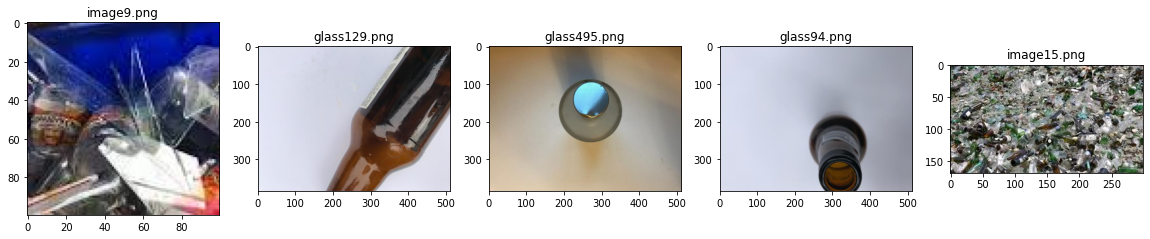

In [4]:
random.seed(10)
plt.figure(figsize=(20,20))

glass_folder = "/content/drive/MyDrive/Awareness of Waste Recycling/glass"
for i in range(5):
    file = random.choice(os.listdir(glass_folder))
    image_path= os.path.join(glass_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

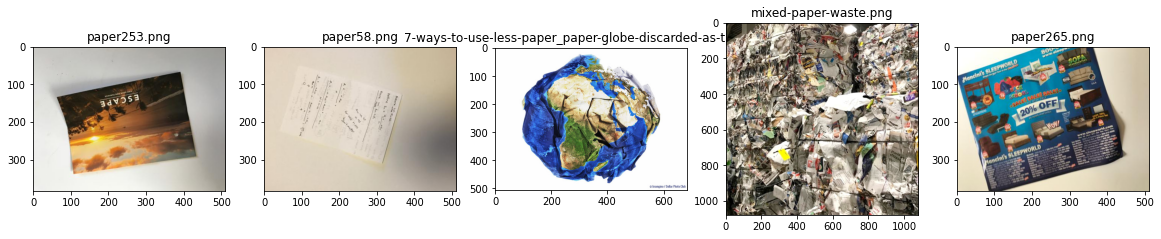

In [5]:
random.seed(10)
plt.figure(figsize=(20,20))

paper_folder = "/content/drive/MyDrive/Awareness of Waste Recycling/paper"
for i in range(5):
    file = random.choice(os.listdir(paper_folder))
    image_path= os.path.join(paper_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [6]:
batch_size = 32
img_height = 180
img_width = 180

In [7]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/drive/MyDrive/Awareness of Waste Recycling',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 7605 files belonging to 9 classes.
Using 6084 files for training.


In [8]:
val_ds = tf.keras.utils.image_dataset_from_directory(
 '/content/drive/MyDrive/Awareness of Waste Recycling',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 7605 files belonging to 9 classes.
Using 1521 files for validation.


In [9]:
class_names = train_ds.class_names
print(class_names)

['batteries', 'clothes', 'e-waste', 'glass', 'light blubs', 'metal', 'organic', 'paper', 'plastic']


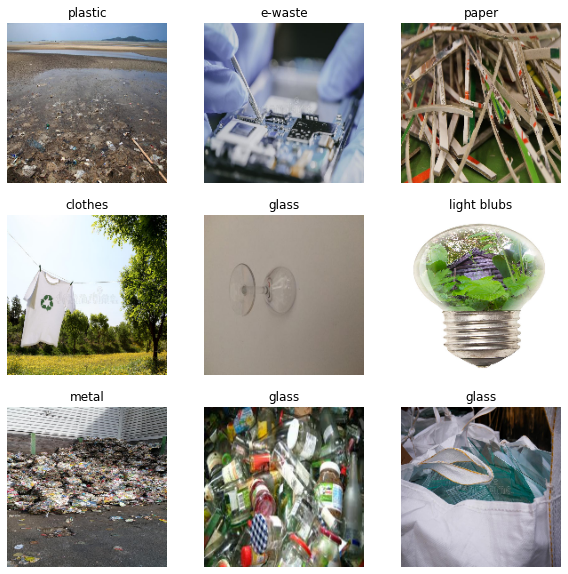

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [11]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [12]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [13]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [14]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0026791922 1.0


In [15]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [18]:
epochs= 8
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/8
191/191 [==============================] - 24s 88ms/step - loss: 2.0293 - accuracy: 0.2528 - val_loss: 1.8405 - val_accuracy: 0.3314
Epoch 2/8
191/191 [==============================] - 4s 20ms/step - loss: 1.7343 - accuracy: 0.3746 - val_loss: 1.6773 - val_accuracy: 0.4122
Epoch 3/8
191/191 [==============================] - 4s 20ms/step - loss: 1.4918 - accuracy: 0.4775 - val_loss: 1.6220 - val_accuracy: 0.4254
Epoch 4/8
191/191 [==============================] - 4s 20ms/step - loss: 1.1886 - accuracy: 0.5853 - val_loss: 1.6799 - val_accuracy: 0.4536
Epoch 5/8
191/191 [==============================] - 4s 20ms/step - loss: 0.8546 - accuracy: 0.7096 - val_loss: 1.8334 - val_accuracy: 0.4747
Epoch 6/8
191/191 [==============================] - 4s 20ms/step - loss: 0.5560 - accuracy: 0.8149 - val_loss: 2.0072 - val_accuracy: 0.4905
Epoch 7/8
191/191 [==============================] - 4s 20ms/step - loss: 0.3331 - accuracy: 0.8935 - val_loss: 2.5829 - val_accuracy: 0.4865
Epoch

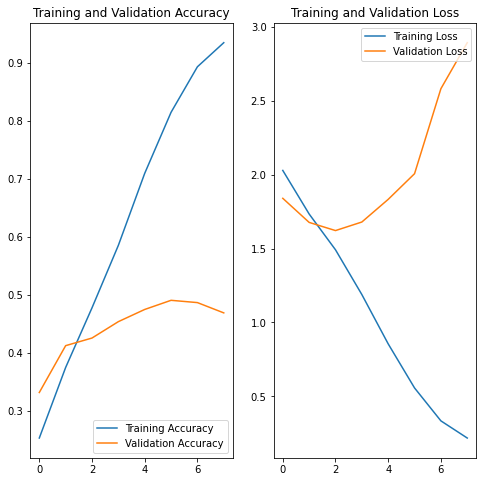

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [20]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

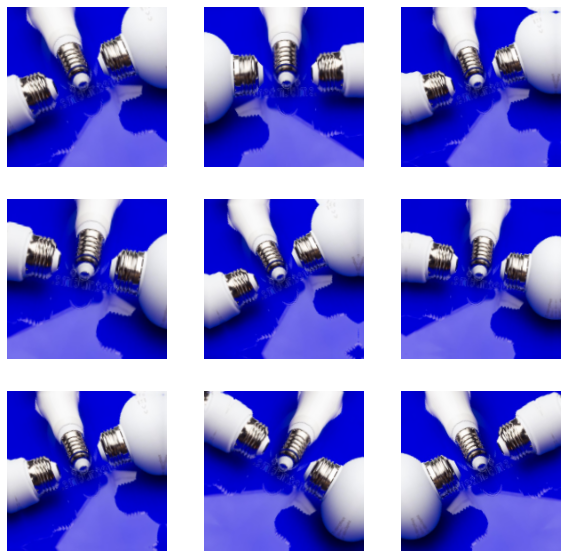

In [21]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [22]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [25]:
epochs = 60
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/60
191/191 [==============================] - 5s 23ms/step - loss: 2.0316 - accuracy: 0.2640 - val_loss: 1.8255 - val_accuracy: 0.3570
Epoch 2/60
191/191 [==============================] - 4s 23ms/step - loss: 1.7953 - accuracy: 0.3522 - val_loss: 1.6627 - val_accuracy: 0.4076
Epoch 3/60
191/191 [==============================] - 4s 22ms/step - loss: 1.6914 - accuracy: 0.3928 - val_loss: 1.6911 - val_accuracy: 0.3833
Epoch 4/60
191/191 [==============================] - 4s 22ms/step - loss: 1.5902 - accuracy: 0.4430 - val_loss: 1.5710 - val_accuracy: 0.4300
Epoch 5/60
191/191 [==============================] - 4s 22ms/step - loss: 1.5214 - accuracy: 0.4574 - val_loss: 1.5408 - val_accuracy: 0.4517
Epoch 6/60
191/191 [==============================] - 4s 22ms/step - loss: 1.4618 - accuracy: 0.4852 - val_loss: 1.5037 - val_accuracy: 0.4609
Epoch 7/60
191/191 [==============================] - 4s 23ms/step - loss: 1.3948 - accuracy: 0.5159 - val_loss: 1.4900 - val_accuracy: 0.4852

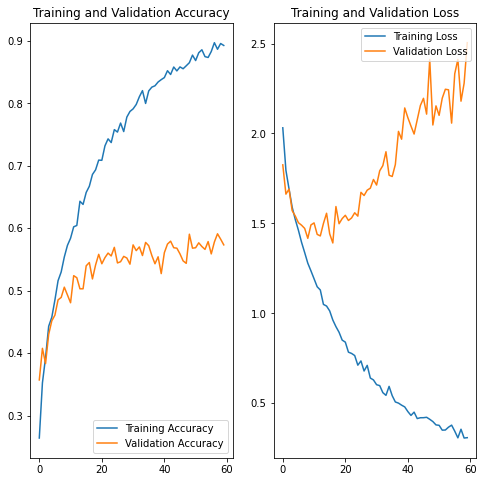

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [30]:
test_url ="/content/drive/MyDrive/fruits.jpg"
test_path = tf.keras.utils.get_file("/content/drive/MyDrive/fruits.jpg", origin=test_url)

img = tf.keras.utils.load_img(
    test_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to clothes with a 94.67 percent confidence.


In [31]:
model.save("WASTE_CLASSIFY.h5")